<a href="https://colab.research.google.com/github/agnislur/air_quality_in_yogyakarta/blob/main/FinalProject_AirQualityML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATASET


# **Data Upload**

# **Data Cleaning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df=pd.read_csv("polusi_udara_jogja2020.csv")
df

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...
361,12/27/2020,12,1,24,0,0,24,CO,Good
362,12/28/2020,9,0,16,2,0,16,CO,Good
363,12/29/2020,9,0,15,20,0,20,O3,Good
364,12/30/2020,6,0,17,10,0,17,CO,Good


Data
- Date - Date of measurements
- PM10 - Particulate Matter measurements
- S02 - Sulfur Dioxide measurements
- C0 - Carbon Monoxide measurements
- 03 - Ozone measurements
- NO2 - Natrium Dioxide measurements
- Max - The Highest measurements value
- Critical Component - Component(s) taht has the highest measurement value
- Category - Category of air pollution, whether it's good or not

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category            366 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.9+ KB


In [4]:
df.shape

(366, 9)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Date                  0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [7]:
df['Category'].unique()

array(['Moderate', 'Good', 'Unhealthy'], dtype=object)

In [8]:
df['Critical Component'].unique()

array(['CO', 'O3', 'PM10', 'PM10, CO', 'PM10,CO', 'CO, PM10', 'PM10,O3'],
      dtype=object)

In [9]:
df.describe()

,PM10,SO2,CO,O3,NO2,Max
count,366.000000,366.000000,366.000000,366.000000,366.0,366.000000
mean,19.699454,1.021858,31.161202,16.054645,0.0,35.800546
std,9.023704,1.012017,22.263521,14.172026,0.0,21.397890
min,3.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,14.000000,0.000000,18.000000,7.000000,0.0,21.000000
50%,18.500000,1.000000,23.500000,14.000000,0.0,28.000000
75%,23.000000,2.000000,40.000000,22.000000,0.0,45.000000
max,60.000000,6.000000,164.000000,81.000000,0.0,164.000000


In [10]:
len(df.columns)

9

In [11]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


**Visualisasi Data**

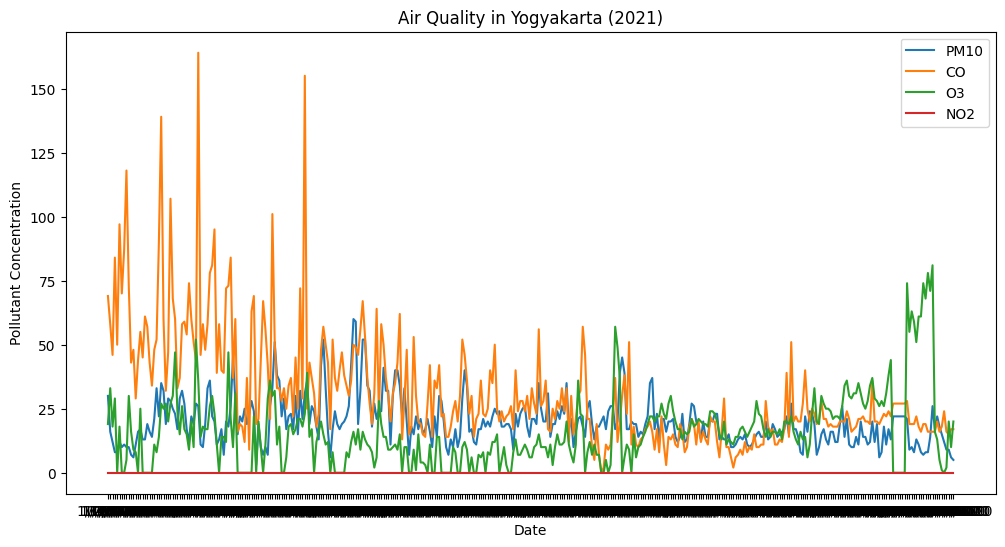

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='PM10', label='PM10')
sns.lineplot(data=df, x='Date', y='CO', label='CO')
sns.lineplot(data=df, x='Date', y='O3', label='O3')
sns.lineplot(data=df, x='Date', y='NO2', label='NO2')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Yogyakarta (2021)')
plt.legend()
plt.show()

C:\Users\alfar\AppData\Local\Temp\ipykernel_11240\1579700810.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


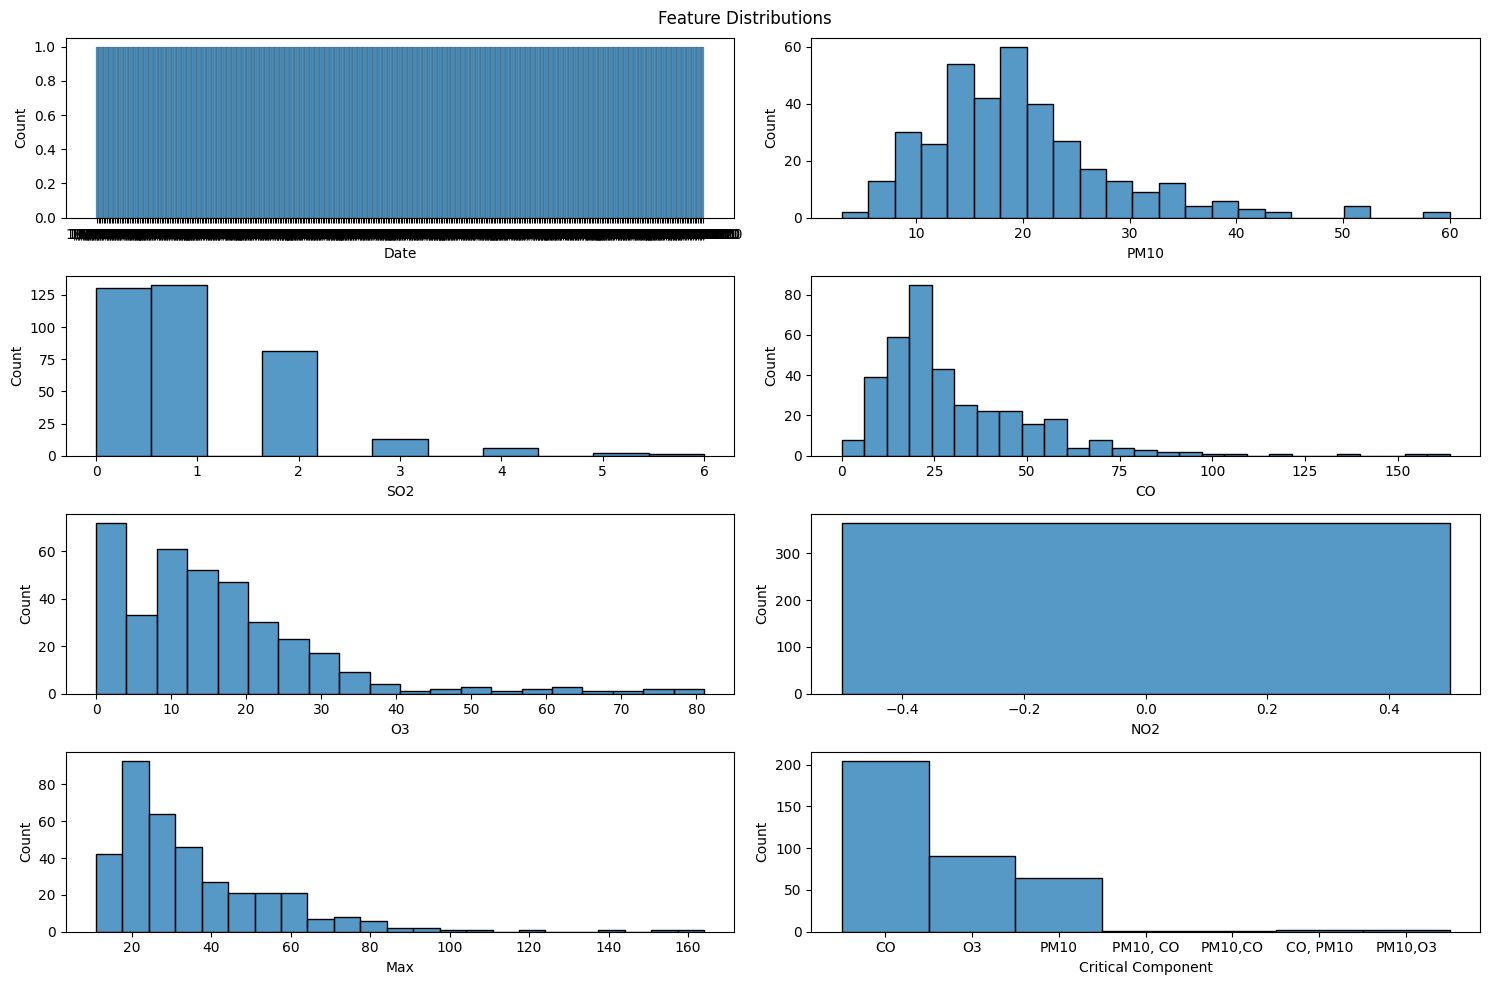

In [13]:
n_rows = 4
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,10))

for i in range(n_rows):
  for j in range(n_cols):
    feature = df.columns[i*n_cols+j]
    sns.histplot(x=df[feature], ax=axs[i][j])

fig.suptitle("Feature Distributions")
fig.tight_layout()
fig.show()

C:\Users\alfar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


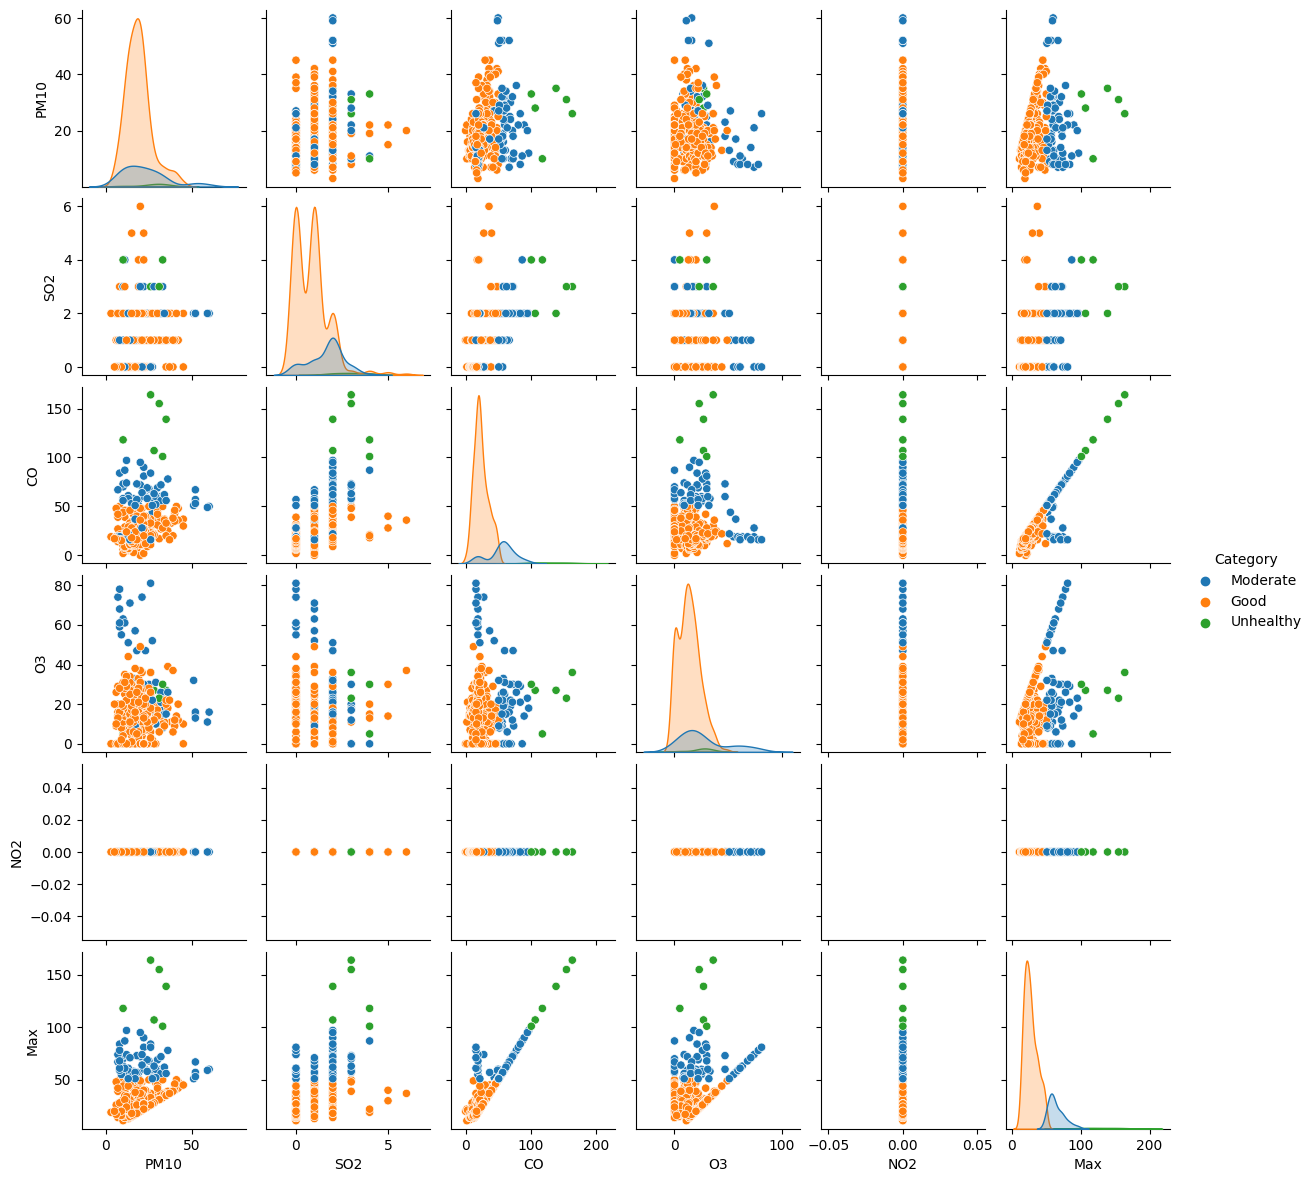

In [14]:
sns.pairplot(df, hue="Category", size=2)
plt.show()

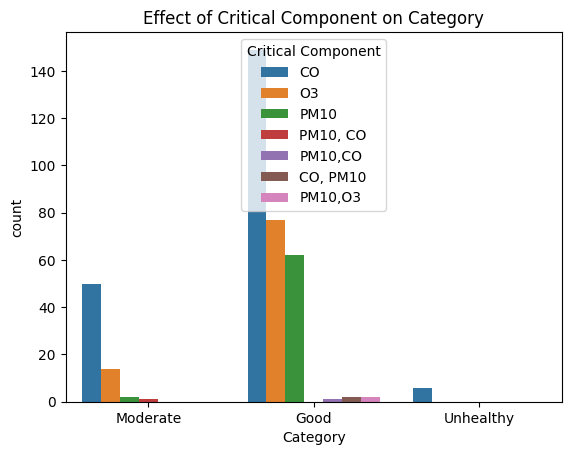

In [15]:
sns.countplot(data=df, x="Category", hue="Critical Component")
plt.title("Effect of Critical Component on Category")
plt.show()

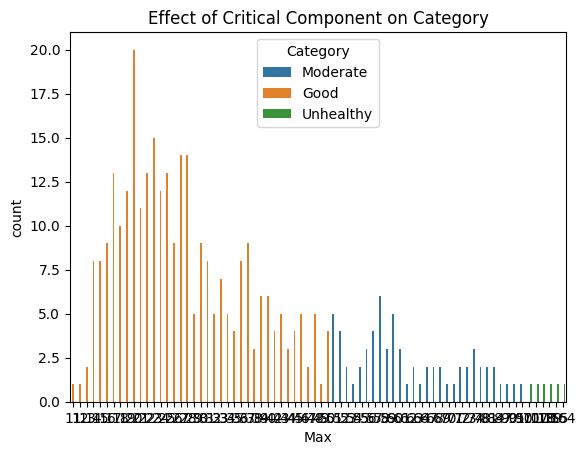

In [16]:
sns.countplot(data=df, x="Max", hue="Category")
plt.title("Effect of Critical Component on Category")
plt.show()

In [17]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


**Label Encoder**

In [18]:
import sklearn
from sklearn.preprocessing import LabelEncoder


In [19]:
processed_data = df.copy()
processed_data["Critical Component"] = LabelEncoder().fit_transform(processed_data["Critical Component"])

# map Label to ordinal encoding
label_map = {
    "Moderate": 1,
    "Good": 2,
    "Unhealthy": 3,
}
processed_data = processed_data.replace({"Category": label_map})

processed_data.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,0,1
1,1/2/2020,16,2,58,33,0,58,0,1
2,1/3/2020,12,2,46,18,0,46,0,2
3,1/4/2020,8,2,84,29,0,84,0,1
4,1/5/2020,8,3,50,0,0,50,0,2


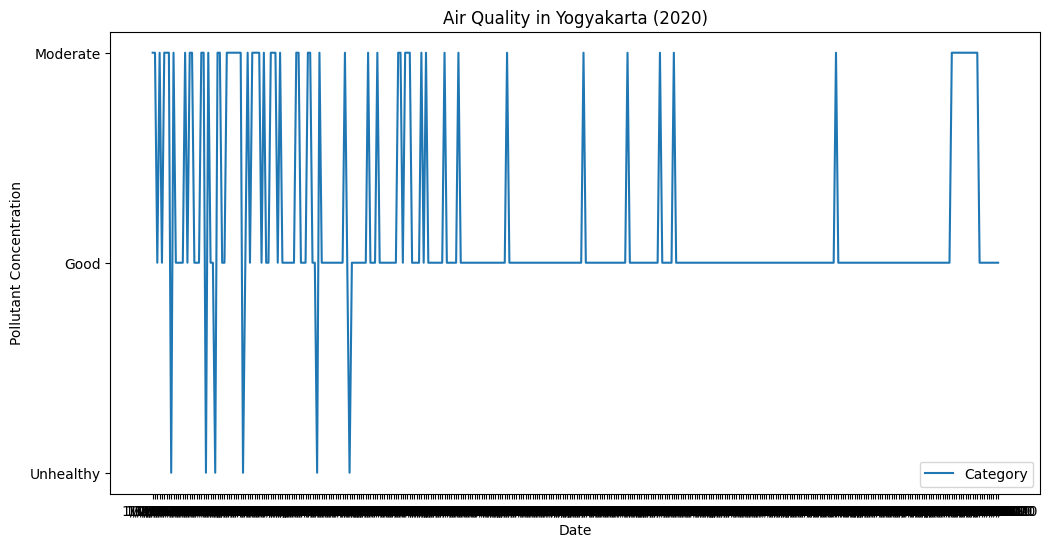

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Category', label='Category')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Yogyakarta (2020)')
plt.legend()
plt.show()

In [21]:
processed_data['Critical Component'].unique()

array([0, 2, 3, 4, 5, 1, 6])

C:\Users\alfar\AppData\Local\Temp\ipykernel_11240\3018298554.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(processed_data.corr(), annot=True)


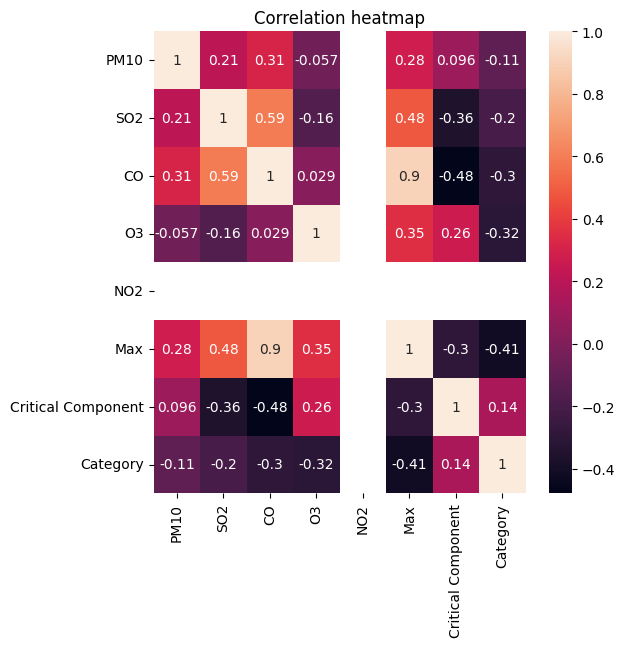

In [22]:
plt.figure(figsize=(6, 6))
sns.heatmap(processed_data.corr(), annot=True)
plt.title("Correlation heatmap")
plt.show()

In [23]:
processed_data['NO2'].unique()

array([0], dtype=int64)

**Drop Data**

In [24]:
processed_data = processed_data.drop(columns=["Max","NO2","Critical Component"])
processed_data.head()

,Date,PM10,SO2,CO,O3,Category
0,1/1/2020,30,2,69,19,1
1,1/2/2020,16,2,58,33,1
2,1/3/2020,12,2,46,18,2
3,1/4/2020,8,2,84,29,1
4,1/5/2020,8,3,50,0,2


In [25]:
processed_data = processed_data.drop(columns=["Date"])
processed_data.head()

,PM10,SO2,CO,O3,Category
0,30,2,69,19,1
1,16,2,58,33,1
2,12,2,46,18,2
3,8,2,84,29,1
4,8,3,50,0,2


**Visualisasi Data processed Data**

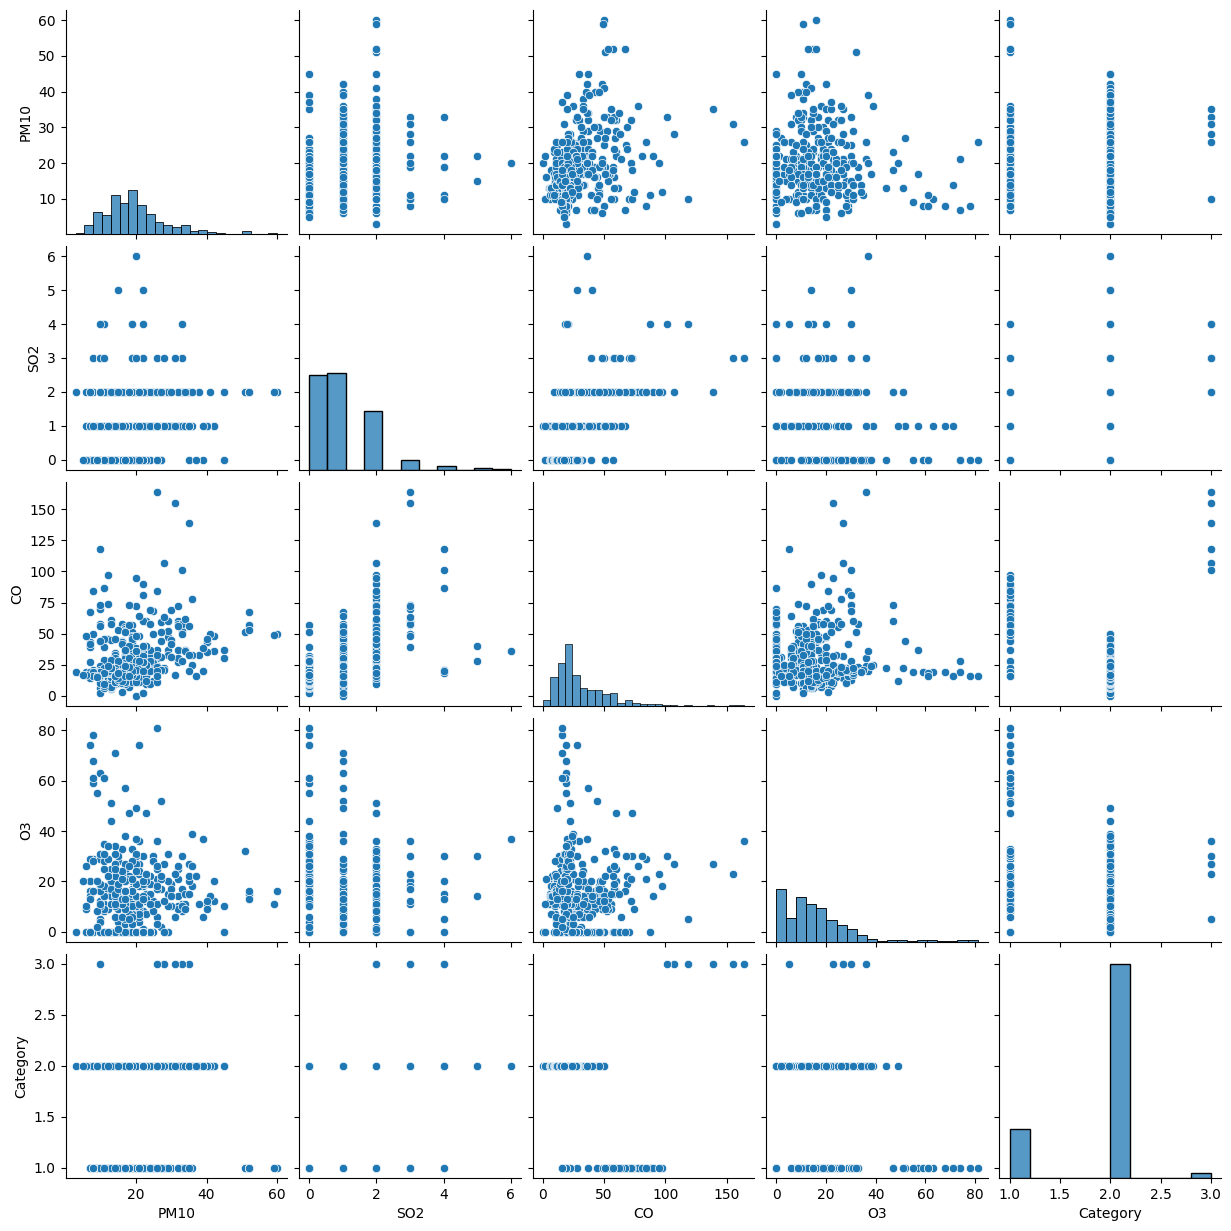

In [26]:
sns.pairplot(processed_data)
plt.show()

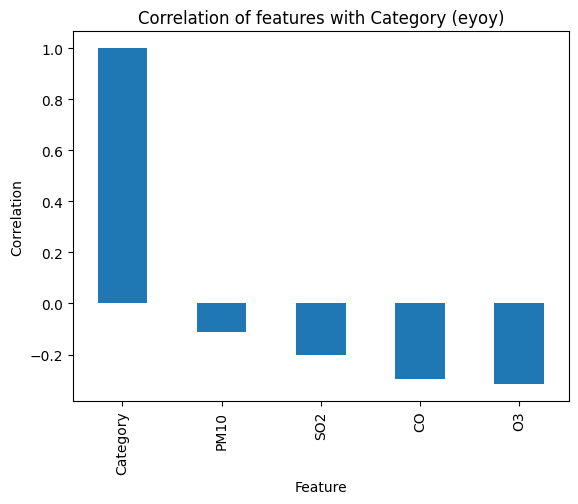

In [27]:
target_corr = processed_data.corr()["Category"]
target_corr = target_corr.sort_values(ascending=False)
target_corr.plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation")
plt.title("Correlation of features with Category (eyoy)")
plt.show()

**Feature Engineering**

In [28]:
X = processed_data[["O3", "CO", "SO2", "PM10"]]
y = processed_data["Category"]

print(X.shape)
print(y.shape)

(366, 4)
(366,)


In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(2)
poly.fit(X)
poly_feats = pd.DataFrame(data=poly.transform(X), columns=poly.get_feature_names_out())
poly_feats = poly_feats.iloc[:, 1:]
print(poly_feats.shape)
poly_feats.head()

(366, 14)


,O3,CO,SO2,PM10,O3^2,O3 CO,O3 SO2,O3 PM10,CO^2,CO SO2,CO PM10,SO2^2,SO2 PM10,PM10^2
0,19.0,69.0,2.0,30.0,361.0,1311.0,38.0,570.0,4761.0,138.0,2070.0,4.0,60.0,900.0
1,33.0,58.0,2.0,16.0,1089.0,1914.0,66.0,528.0,3364.0,116.0,928.0,4.0,32.0,256.0
2,18.0,46.0,2.0,12.0,324.0,828.0,36.0,216.0,2116.0,92.0,552.0,4.0,24.0,144.0
3,29.0,84.0,2.0,8.0,841.0,2436.0,58.0,232.0,7056.0,168.0,672.0,4.0,16.0,64.0
4,0.0,50.0,3.0,8.0,0.0,0.0,0.0,0.0,2500.0,150.0,400.0,9.0,24.0,64.0


In [31]:
poly_feats["Category"] = y

**Visualisasi data untuk cek**

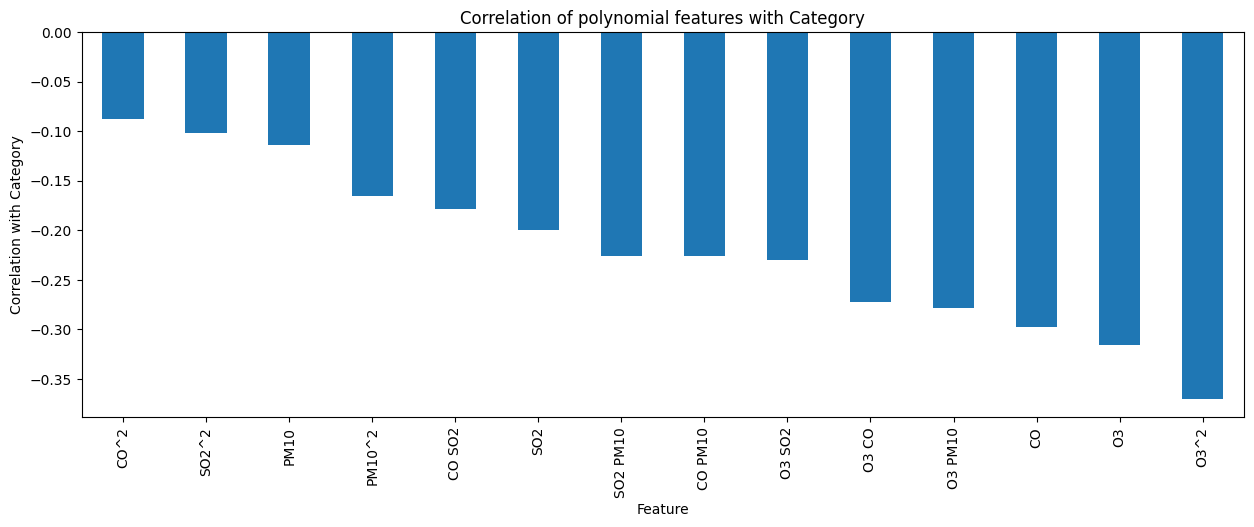

In [32]:
target_corr = poly_feats.corr()["Category"]
target_corr = target_corr.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
target_corr[1:].plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation with Category")
plt.title("Correlation of polynomial features with Category")
plt.show()

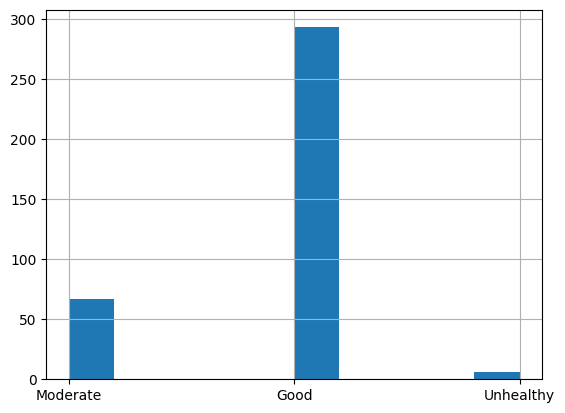

In [33]:
df["Category"].hist()
plt.show()

**Modelling**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Oversampling**

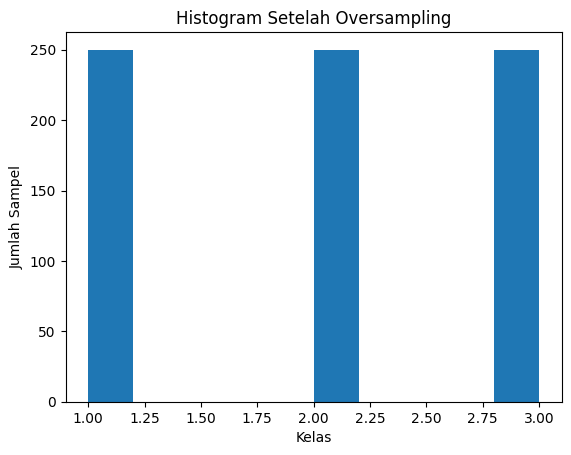

In [35]:
oversampler = RandomOverSampler(sampling_strategy={1:250,2:250,3:250}, random_state=42)
X_train_resampled9, y_train_resampled9 = oversampler.fit_resample(X_train, y_train)
plt.hist(y_train_resampled9)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Histogram Setelah Oversampling')
plt.show()

**Visualisasi setelah dan sebelum oversampling**

<Figure size 1200x400 with 0 Axes>

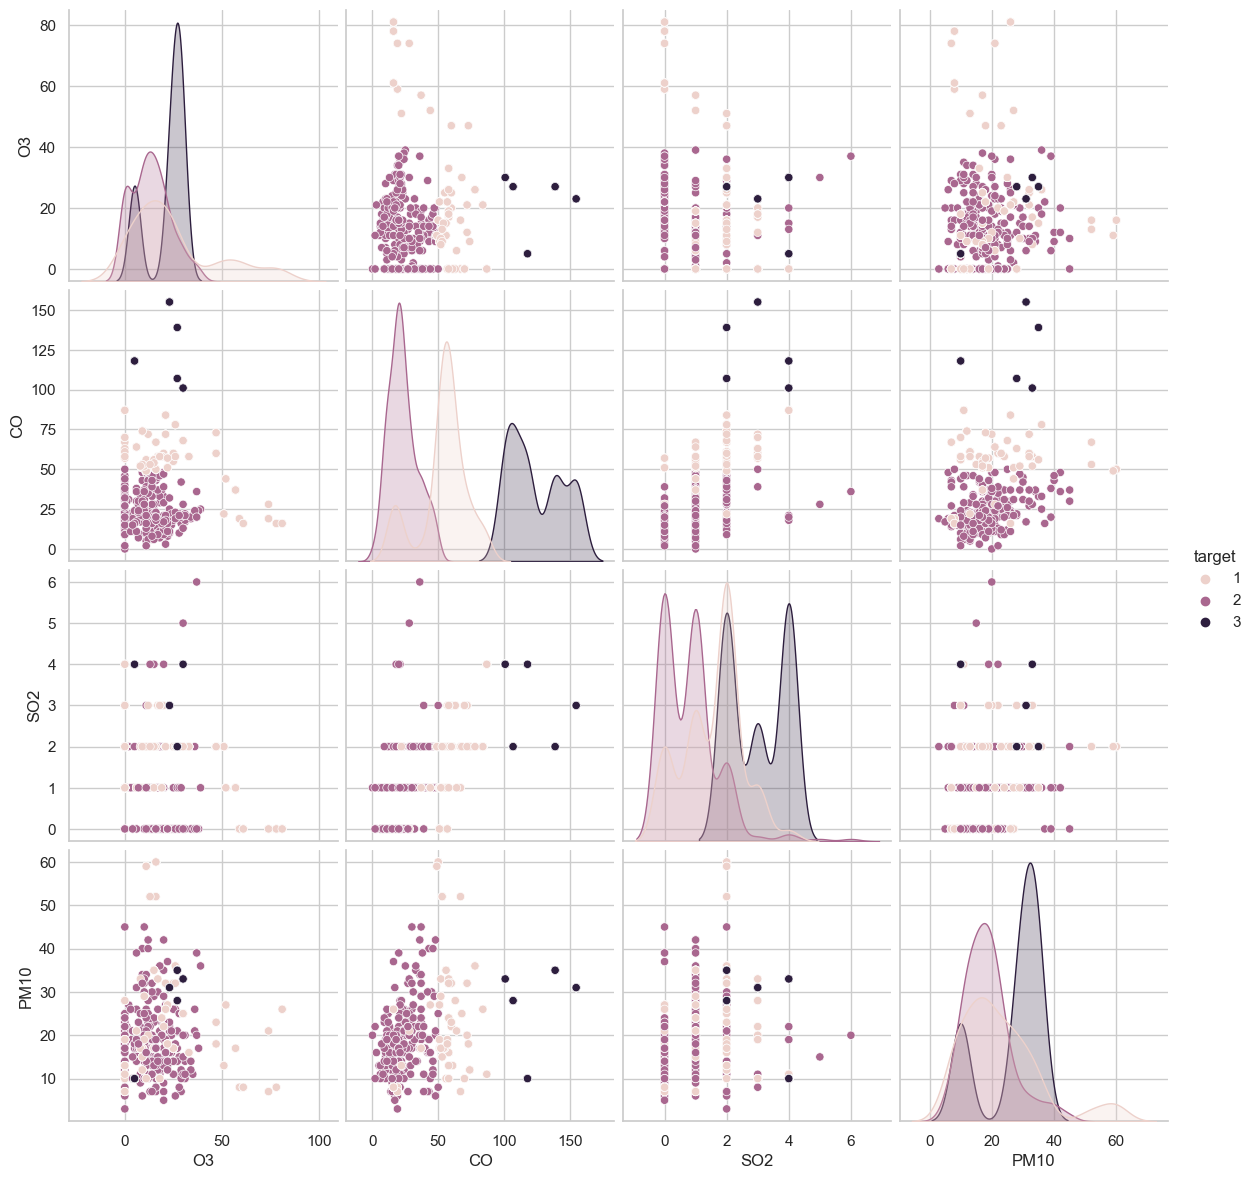

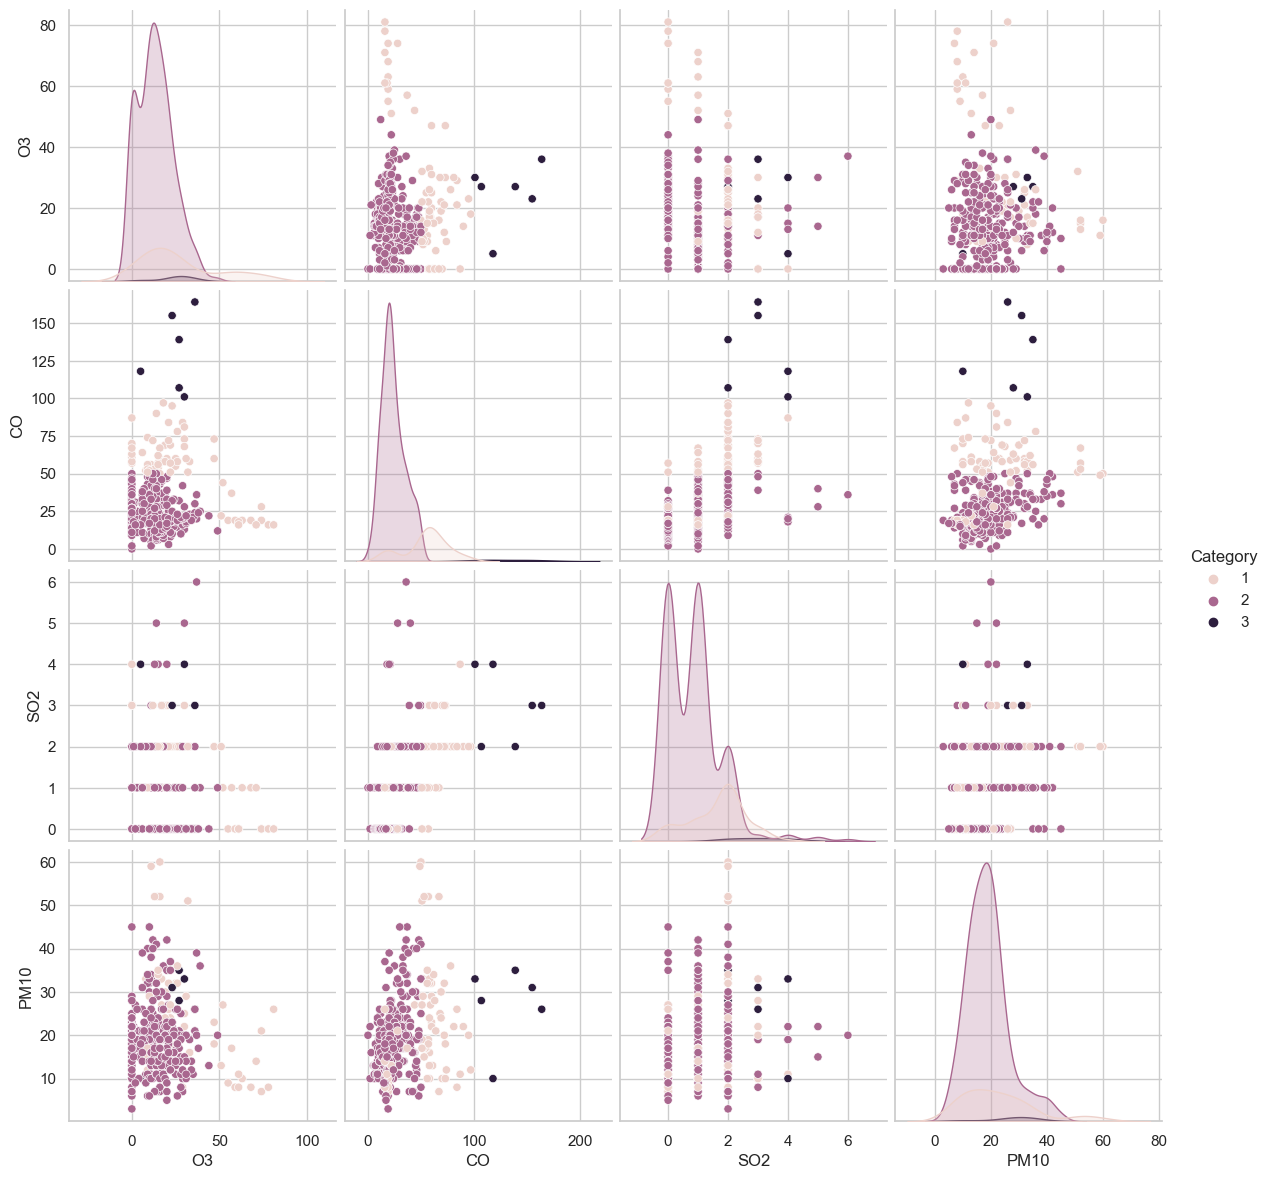

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

df_resampled = pd.DataFrame(X_train_resampled9, columns=X_train.columns)
df_resampled['target'] = y_train_resampled9

sns.set(style="whitegrid")
plt.figure(figsize=(12, 4))

sns.pairplot(df_resampled[['O3', 'CO', 'SO2', 'PM10', 'target']], hue='target', diag_kind='kde', height=3, aspect=1)
plt.show()

sns.pairplot(processed_data[['O3', 'CO', 'SO2', 'PM10', 'Category']], hue='Category', diag_kind='kde', height=3, aspect=1)
plt.show()


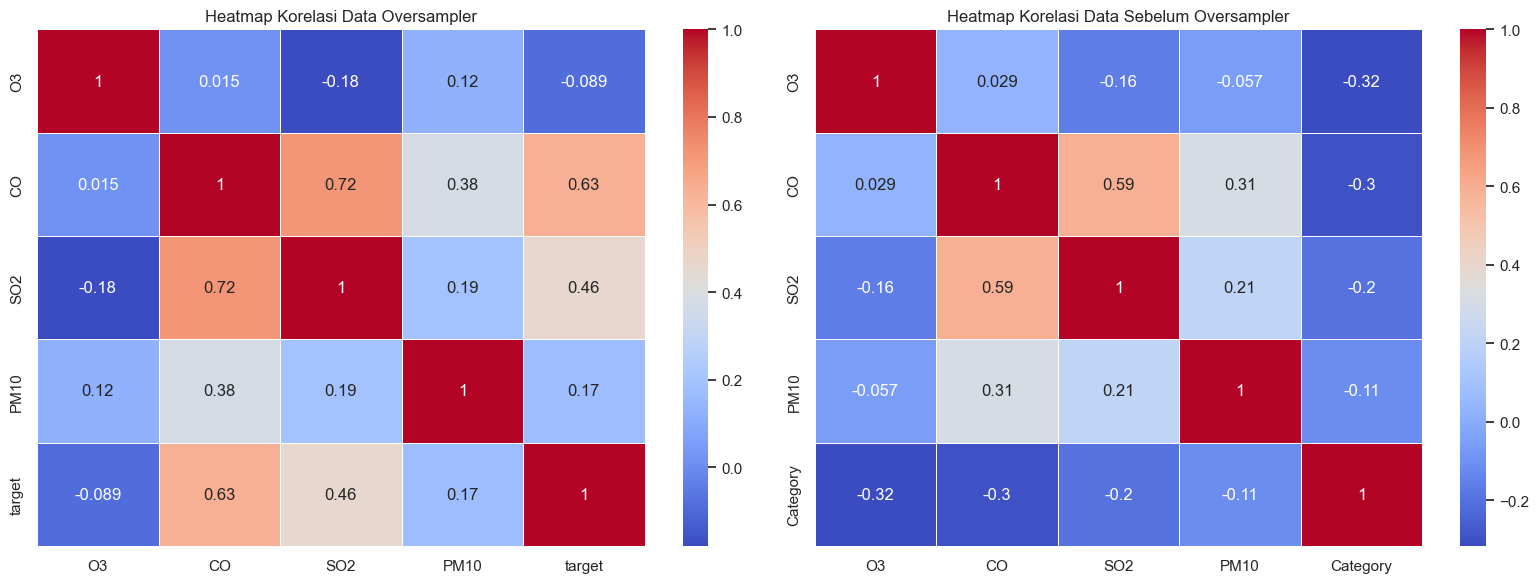

In [37]:

df_resampledb = pd.DataFrame(X_train_resampled9, columns=X_train.columns)
df_resampledb['target'] = y_train_resampled9

correlation_matrix_oversampler = df_resampledb[['O3', 'CO', 'SO2', 'PM10', 'target']].corr()

correlation_matrix_original = processed_data[['O3', 'CO', 'SO2', 'PM10', 'Category']].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Heatmap Korelasi Data Sebelum Oversampler')

sns.heatmap(correlation_matrix_oversampler, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Heatmap Korelasi Data Oversampler')

plt.tight_layout()
plt.show()


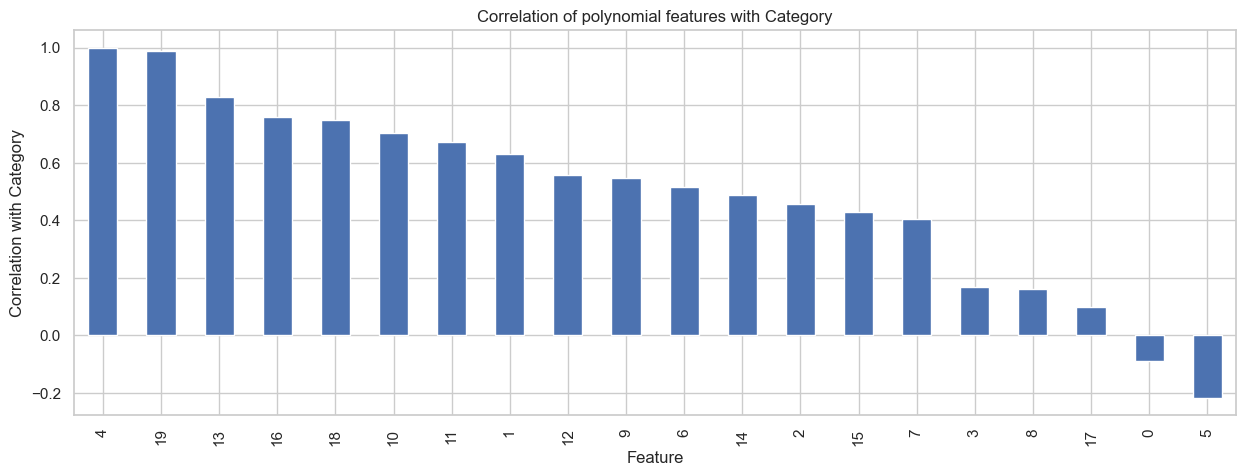

In [38]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat objek PolynomialFeatures dengan derajat yang diinginkan (contoh: derajat 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Menggunakan objek PolynomialFeatures untuk mengubah X_train_resampled9 menjadi fitur polinomial
X_train_resampled_poly = poly_features.fit_transform(X_train_resampled9)

# Membuat DataFrame dari data oversampler yang telah diubah menjadi fitur polinomial
df_resampled_poly = pd.DataFrame(X_train_resampled_poly)

# Menambahkan kolom target ke DataFrame
df_resampled_poly['target'] = y_train_resampled9

# Menghitung korelasi antara fitur-fitur polinomial dan target (Category)
target_corr = df_resampled_poly.corr()["target"]
target_corr = target_corr.sort_values(ascending=False)

# Mengatur ukuran plot
plt.figure(figsize=(15, 5))

# Barplot Korelasi Fitur Polinomial dengan Target (Category)
target_corr[1:].plot(kind="bar")
plt.xlabel("Feature")
plt.ylabel("Correlation with Category")
plt.title("Correlation of polynomial features with Category")
plt.show()


**GradientBoostingClassifier + Cross validation + Oversampling**

In [39]:
X_train_resampledvv, y_train_resampledvv = oversampler.fit_resample(X_train, y_train)

gradient_boosting_classifier0 = GradientBoostingClassifier(n_estimators=100, random_state=42)

cv_scores = cross_val_score(gradient_boosting_classifier0, X_train_resampledvv, y_train_resampledvv, cv=5)

train_accuracy = cv_scores.mean()

gradient_boosting_classifier0.fit(X_train_resampledvv, y_train_resampledvv)

test_accuracy = gradient_boosting_classifier0.score(X_test, y_test)

print("Akurasi Pelatihan (Train Accuracy):", train_accuracy)
print("Akurasi Pengujian (Test Accuracy):", test_accuracy)


Akurasi Pelatihan (Train Accuracy): 0.9986666666666666
Akurasi Pengujian (Test Accuracy): 0.9594594594594594


**Evaluasi GradientboostingClassifier + Oversampling**

Evaluasi Macro
Akurasi: 0.96
Presisi: 0.76
Recall: 0.96
F1-Score: 0.80

Evaluasi Micro
Akurasi: 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96


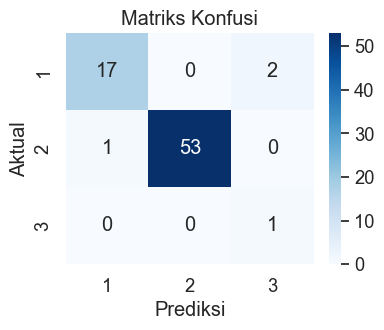

In [40]:
gradient_boosting_classifier0.fit(X_train_resampledvv, y_train_resampledvv)

y_pred = gradient_boosting_classifier0.predict(X_test)

print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,  average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

print("Evaluasi Micro")
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='micro')
recall1 = recall_score(y_test, y_pred,  average='micro')
f11 = f1_score(y_test, y_pred,  average='micro')

print("Akurasi: {:.2f}".format(accuracy1))
print("Presisi: {:.2f}".format(precision1))
print("Recall: {:.2f}".format(recall1))
print("F1-Score: {:.2f}".format(f11))
class_labels = sorted(set(y_test))

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

**LogisticRegression + Cross validation + Oversampling**

In [41]:
X_train_resampledyy, y_train_resampledyy = oversampler.fit_resample(X_train, y_train)
logistic_regression0 = LogisticRegression(max_iter=1000, random_state=42)


logisrek = Pipeline ([
    ('Model', logistic_regression0)
])

cv_scores = cross_val_score(logistic_regression0, X_train_resampledyy, y_train_resampledyy, cv=5)

train_accuracy = cv_scores.mean()
logistic_regression0.fit(X_train_resampledyy, y_train_resampledyy)
test_accuracy = logistic_regression0.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9853333333333334
Test Accuracy: 0.9459459459459459


**evaluasi LogisticRegression + Cross validation + Oversampling**

Evaluasi Macro
Akurasi: 0.95
Presisi: 0.94
Recall: 0.98
F1-Score: 0.96

Evaluasi Micro
Akurasi: 0.95
Presisi: 0.95
Recall: 0.95
F1-Score: 0.95


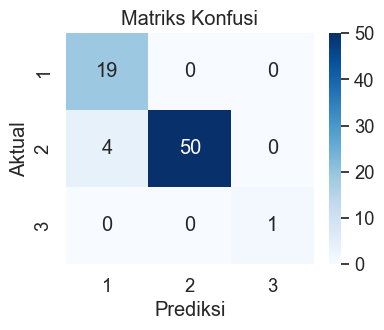

In [42]:
logistic_regression0.fit(X_train_resampledyy, y_train_resampledyy)

y_pred = logistic_regression0.predict(X_test)

print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,  average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

print("Evaluasi Micro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred,  average='micro')
f1 = f1_score(y_test, y_pred,  average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

**DecisionTreeClassifier + Cross validation + Oversampling**

In [43]:
X_train_resampledtt, y_train_resampledtt = oversampler.fit_resample(X_train, y_train)

decision_tree_classifier0 = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(decision_tree_classifier0, X_train_resampledtt, y_train_resampledtt, cv=5)

train_accuracy = cv_scores.mean()

decision_tree_classifier0.fit(X_train_resampledtt, y_train_resampledtt)

test_accuracy = decision_tree_classifier0.score(X_test, y_test)

print("Akurasi Pelatihan (Train Accuracy):", train_accuracy)
print("Akurasi Pengujian (Test Accuracy):", test_accuracy)


Akurasi Pelatihan (Train Accuracy): 0.9973333333333333
Akurasi Pengujian (Test Accuracy): 0.9594594594594594


**Evaluasi DecisionTreeClassifier + Cross validation + Oversampling**

Evaluasi Micro
Akurasi: 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96

Evaluasi Macro
Akurasi: 0.96
Presisi: 0.76
Recall: 0.96
F1-Score: 0.80


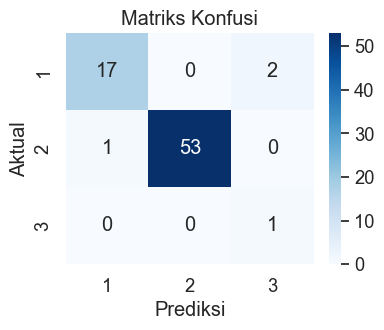

In [44]:
decision_tree_classifier0.fit(X_train_resampledtt, y_train_resampledtt)

y_pred = decision_tree_classifier0.predict(X_test)

print("Evaluasi Micro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred,  average='micro')
f1 = f1_score(y_test, y_pred,  average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,  average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()


**RandomForestClassifier + Cross validation + Oversampling**

In [45]:
X_train_resampledrr, y_train_resampledrr = oversampler.fit_resample(X_train, y_train)

random_forest_classifier0 = RandomForestClassifier(n_estimators=1000, random_state=42)

cv_scores = cross_val_score(random_forest_classifier0, X_train_resampledrr, y_train_resampledrr, cv=5)

train_accuracy = cv_scores.mean()

random_forest_classifier0.fit(X_train_resampledrr, y_train_resampledrr)

test_accuracy = random_forest_classifier0.score(X_test, y_test)

print("Akurasi Pelatihan (Train Accuracy):", train_accuracy)
print("Akurasi Pengujian (Test Accuracy):", test_accuracy)


Akurasi Pelatihan (Train Accuracy): 0.9946666666666666
Akurasi Pengujian (Test Accuracy): 0.9459459459459459


**Evaluasi RandomForestClassifier + Cross validation + Oversampling**

Evaluasi Micro
Akurasi: 0.95
Presisi: 0.95
Recall: 0.95
F1-Score: 0.95

Evaluasi Macro
Akurasi: 0.95
Presisi: 0.74
Recall: 0.95
F1-Score: 0.79


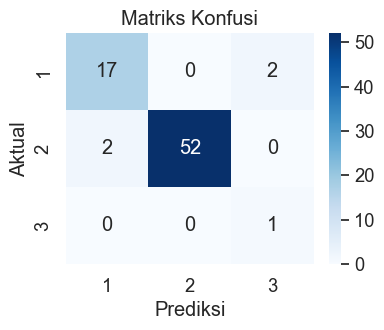

In [46]:
random_forest_classifier0.fit(X_train_resampledrr, y_train_resampledrr)

y_pred = random_forest_classifier0.predict(X_test)

print("Evaluasi Micro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred,  average='micro')
f1 = f1_score(y_test, y_pred,  average='micro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}\n".format(f1))

print("Evaluasi Macro")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred,  average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi: {:.2f}".format(accuracy))
print("Presisi: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Matriks Konfusi")
plt.show()

In [47]:
import pickle

pickle.dump(logisrek, open('model.pkl', 'wb'))

In [48]:
pickle.dump(df, open('data.pkl', 'wb'))